In [1]:
# Larger CNN for the MNIST Dataset
import numpy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
K.set_image_data_format('channels_last')

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32')


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np

def plotDigitGrid(X,y,idxs,y_hat=None):
    plt.figure(figsize=(12,10))

    for i in range(len(idxs)):
        plt.subplot(5,6,i+1)
        
        if y_hat is None:
            plt.title('Label: {label}'.format(label=y[idxs[i]]))
        else:
            plt.title("Label: {label}  Pred: {pred}".format(label=y[idxs[i]], pred=y_hat[idxs[i]]))
        
        plt.imshow(X[idxs[i]].reshape(28,28), cmap='Greys')
        plt.tick_params(
            axis='both',          # changes apply to the x-axis and y-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # tick marks on bottom side are off
            left=False,        # tick marks on left side are off
            labelleft=False,   # label on left side are off
            labelbottom=False) # labels along the bottom edge are off

    plt.show()


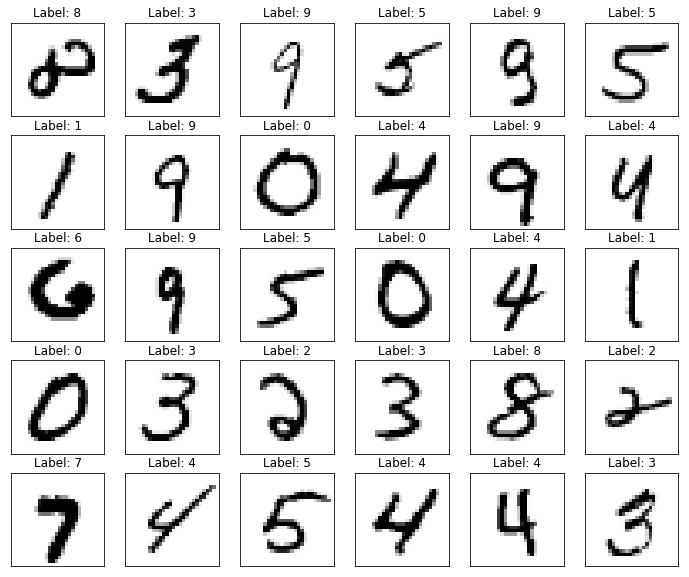

In [6]:
np.random.seed(29)
idxs = np.random.choice(y_train.shape[0],30)

plotDigitGrid(X_train,y_train,idxs)

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = larger_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=10, batch_size=256,verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("\n\nLarge CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 17s - loss: 0.4349 - acc: 0.8628 - val_loss: 0.1033 - val_acc: 0.9693
Epoch 2/10
 - 18s - loss: 0.1112 - acc: 0.9661 - val_loss: 0.0611 - val_acc: 0.9814
Epoch 3/10
 - 17s - loss: 0.0794 - acc: 0.9756 - val_loss: 0.0398 - val_acc: 0.9875
Epoch 4/10
 - 17s - loss: 0.0643 - acc: 0.9801 - val_loss: 0.0360 - val_acc: 0.9883
Epoch 5/10
 - 17s - loss: 0.0529 - acc: 0.9837 - val_loss: 0.0323 - val_acc: 0.9888
Epoch 6/10
 - 17s - loss: 0.0445 - acc: 0.9860 - val_loss: 0.0280 - val_acc: 0.9907
Epoch 7/10
 - 17s - loss: 0.0420 - acc: 0.9868 - val_loss: 0.0257 - val_acc: 0.9918
Epoch 8/10
 - 18s - loss: 0.0377 - acc: 0.9878 - val_loss: 0.0310 - val_acc: 0.9906
Epoch 9/10
 - 17s - loss: 0.0339 - acc: 0.9891 - val_loss: 0.0250 - val_acc: 0.9921
Epoch 10/10
 - 17s - loss: 0.0320 - acc: 0.9895 - val_loss: 0.0232 - val_acc: 0.9919


Large CNN Error: 0.81%
